In [21]:
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import keras
import cv2

In [3]:
data_set="C:\\Users\\acer\\Desktop\\sponsorship letter\\Datasets"

In [4]:
import pathlib

In [5]:
data_dir = pathlib.Path(data_set)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3000


In [6]:
no_tumor=list(data_dir.glob('no/*'))

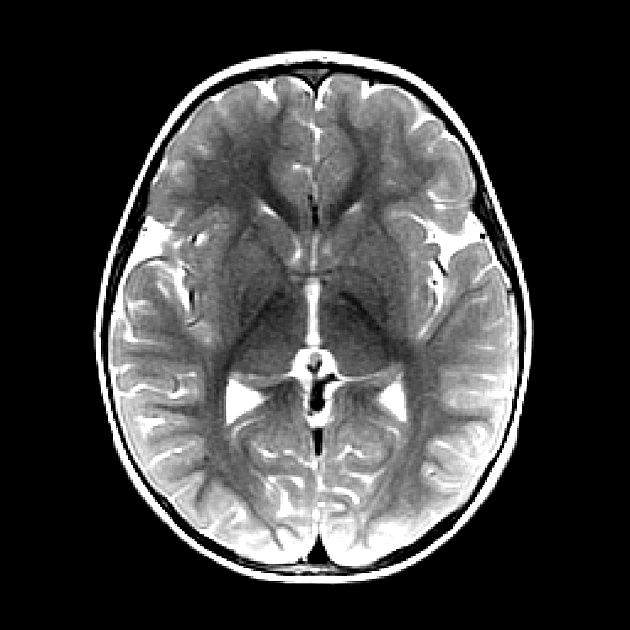

In [7]:
PIL.Image.open(str(no_tumor[0]))

In [8]:
yes_tumor=list(data_dir.glob('yes/*'))

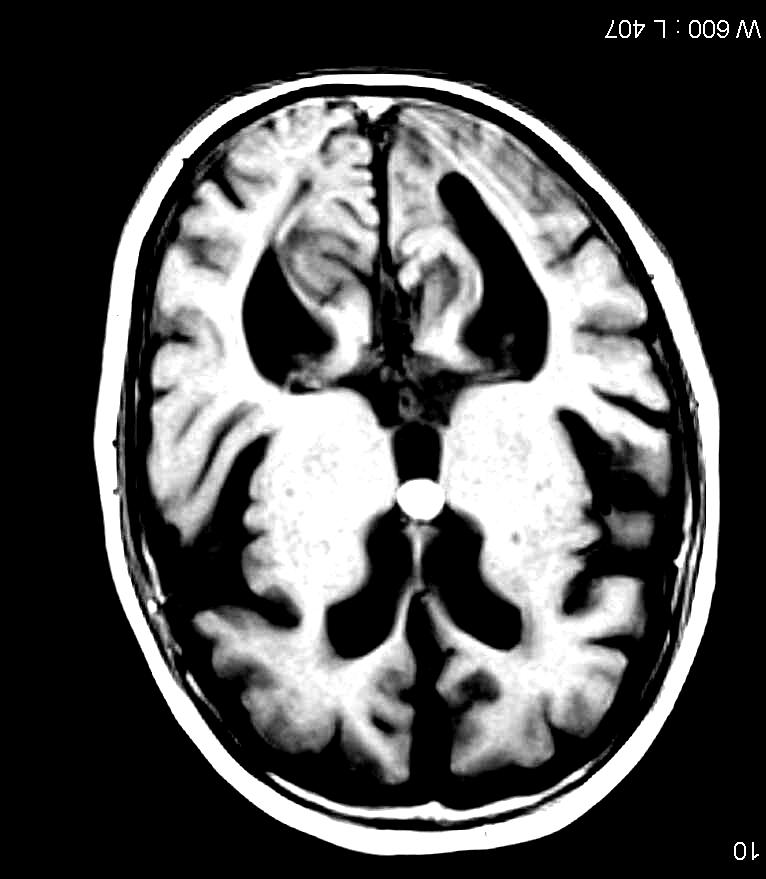

In [9]:
PIL.Image.open(str(yes_tumor[2]))

In [10]:
cv2.imread(str(yes_tumor[5])).shape

(303, 223, 3)

In [11]:
image_dict={
    "no":list(data_dir.glob('no/*')),
    "yes":list(data_dir.glob('yes/*'))
}

In [12]:
image_label={
    "no":0,
    "yes":1
}

In [13]:
X,y=[],[]
for tumor,images in image_dict.items():
    for image in images:
        image=cv2.imread(str(image))
        image_resize=cv2.resize(image,(180,180))
        X.append(image_resize)
        y.append(image_label[tumor])
        
    

In [15]:
X=np.array(X)
y=np.array(y)
X

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [127]:
#  X_scale=X/255

In [16]:
import sklearn

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=X.astype('float32')

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [22]:
data_agumentation=keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
#     tf.keras.layers.experimental.preprocessing.RandomFlip(,input_shape=(180,180,3))
])

In [ ]:
model=keras.Sequential([
#     CNN
    data_agumentation,
    keras.layers.Conv2D(16,3,input_shape=(180,180,3),activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
#     layers
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
71/71 [==============================] - 5s 37ms/step - loss: 67.6317 - accuracy: 0.6051
Epoch 2/50
71/71 [==============================] - 3s 36ms/step - loss: 0.4880 - accuracy: 0.7664
Epoch 3/50
71/71 [==============================] - 3s 36ms/step - loss: 0.4555 - accuracy: 0.7957
Epoch 4/50
71/71 [==============================] - 2s 35ms/step - loss: 0.4538 - accuracy: 0.7927
Epoch 5/50
71/71 [==============================] - 2s 35ms/step - loss: 0.4259 - accuracy: 0.8301
Epoch 6/50
71/71 [==============================] - 3s 36ms/step - loss: 0.3657 - accuracy: 0.8400
Epoch 7/50
71/71 [==============================] - 2s 35ms/step - loss: 0.3703 - accuracy: 0.8359
Epoch 8/50
71/71 [==============================] - 2s 35ms/step - loss: 0.3645 - accuracy: 0.8330 0s - loss: 0.3608 - accura
Epoch 9/50
71/71 [==============================] - 2s 35ms/step - loss: 0.3439 - accuracy: 0.8676
Epoch 10/50
71/71 [==============================] - 2s 35ms/step - loss: 0.3646 

In [211]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 1s 9ms/step - loss: 0.0895 - accuracy: 0.9747


[0.08946342766284943, 0.9746666550636292]

In [212]:
pred=model.predict(X_test)

In [213]:
pred=[np.argmax(i) for i in pred]

In [215]:
y_test[10:15]

array([1, 0, 0, 0, 1])

In [217]:
pred[10:15]

[1, 0, 0, 0, 1]

In [218]:
def predict(predict,index):
    if predict[index]==0:
        return "no_tumor"
    else:
        return "yes _tumor"

In [219]:
def true(true,index):
    if true[index]==0:
        return "no_tumor"
    else:
        return "yes _tumor"

In [220]:
for i in range(0,5):
    print(predict(pred,i))
   

no_tumor
no_tumor
yes _tumor
yes _tumor
yes _tumor


In [221]:
for i in range(0,5):
    print(true(y_test,i))

no_tumor
no_tumor
yes _tumor
yes _tumor
yes _tumor


In [222]:
from sklearn.metrics import classification_report,confusion_matrix

In [223]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       419
           1       0.96      0.98      0.97       331

    accuracy                           0.97       750
   macro avg       0.97      0.98      0.97       750
weighted avg       0.97      0.97      0.97       750



In [224]:
cm=confusion_matrix(y_test,pred)

In [225]:
import seaborn as sm
import matplotlib.pyplot as plt

Text(87.0, 0.5, 'Predicted')

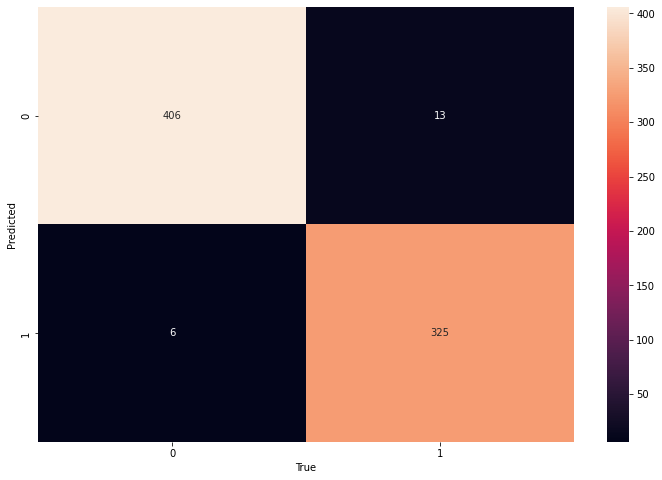

In [226]:
plt.figure(figsize=(12,8))
sm.heatmap(cm,annot=True,fmt="d")
plt.xlabel("True")
plt.ylabel("Predicted")